## Problem Description:
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.After the recent funding programmes, they have been able to raise around 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

## Problem Statements:
Categorise the countries using some socio-economic and health factors that determine the overall development of the country. Suggest the countries which the CEO needs to focus on the most.

In [1]:
import pandas as pd
import numpy as np

#To visualization
import matplotlib.pyplot as plt
import seaborn as sns

#To compress warning
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#For scaling
from sklearn.preprocessing import scale

# To perform KMean clustring
from sklearn.cluster import KMeans

#to perfrom Hierarchical clustring
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import linkage

In [2]:
dat1 = pd.read_csv(r'C:\Users\Rajesh\Desktop\main\Rajesh\Data Science\Clustering & PCA Assignment\cont.csv')
dat1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### As per data,we need to remove country column for pca

In [3]:
dat = dat1.drop('country',axis =1)

In [4]:
dat.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### It has all numeric columns

### Perform EDA and Normalization..
1. What is the shape of data
2. what is the properties of data
3. check if null values
4. what is the data type of the columns


In [5]:
#Shape of the dataframe
dat.shape

(167, 9)

In [6]:
# see the data mean, max since all data are numeric
dat.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
# There is no null values in any columns
dat.isna().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [8]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2)
memory usage: 11.8 KB


### Since some column are in percentage so we need to have conversion

In [9]:
#Since some column are in percentage so we need to have conversion
dat['export'] = dat['exports']*dat['gdpp']/100
dat['import'] = dat['imports']*dat['gdpp']/100
dat['health'] = dat['health']*dat['gdpp']/100

### Perorm pair plot what is the relation between each variable.
### It will check if any multicolinirity

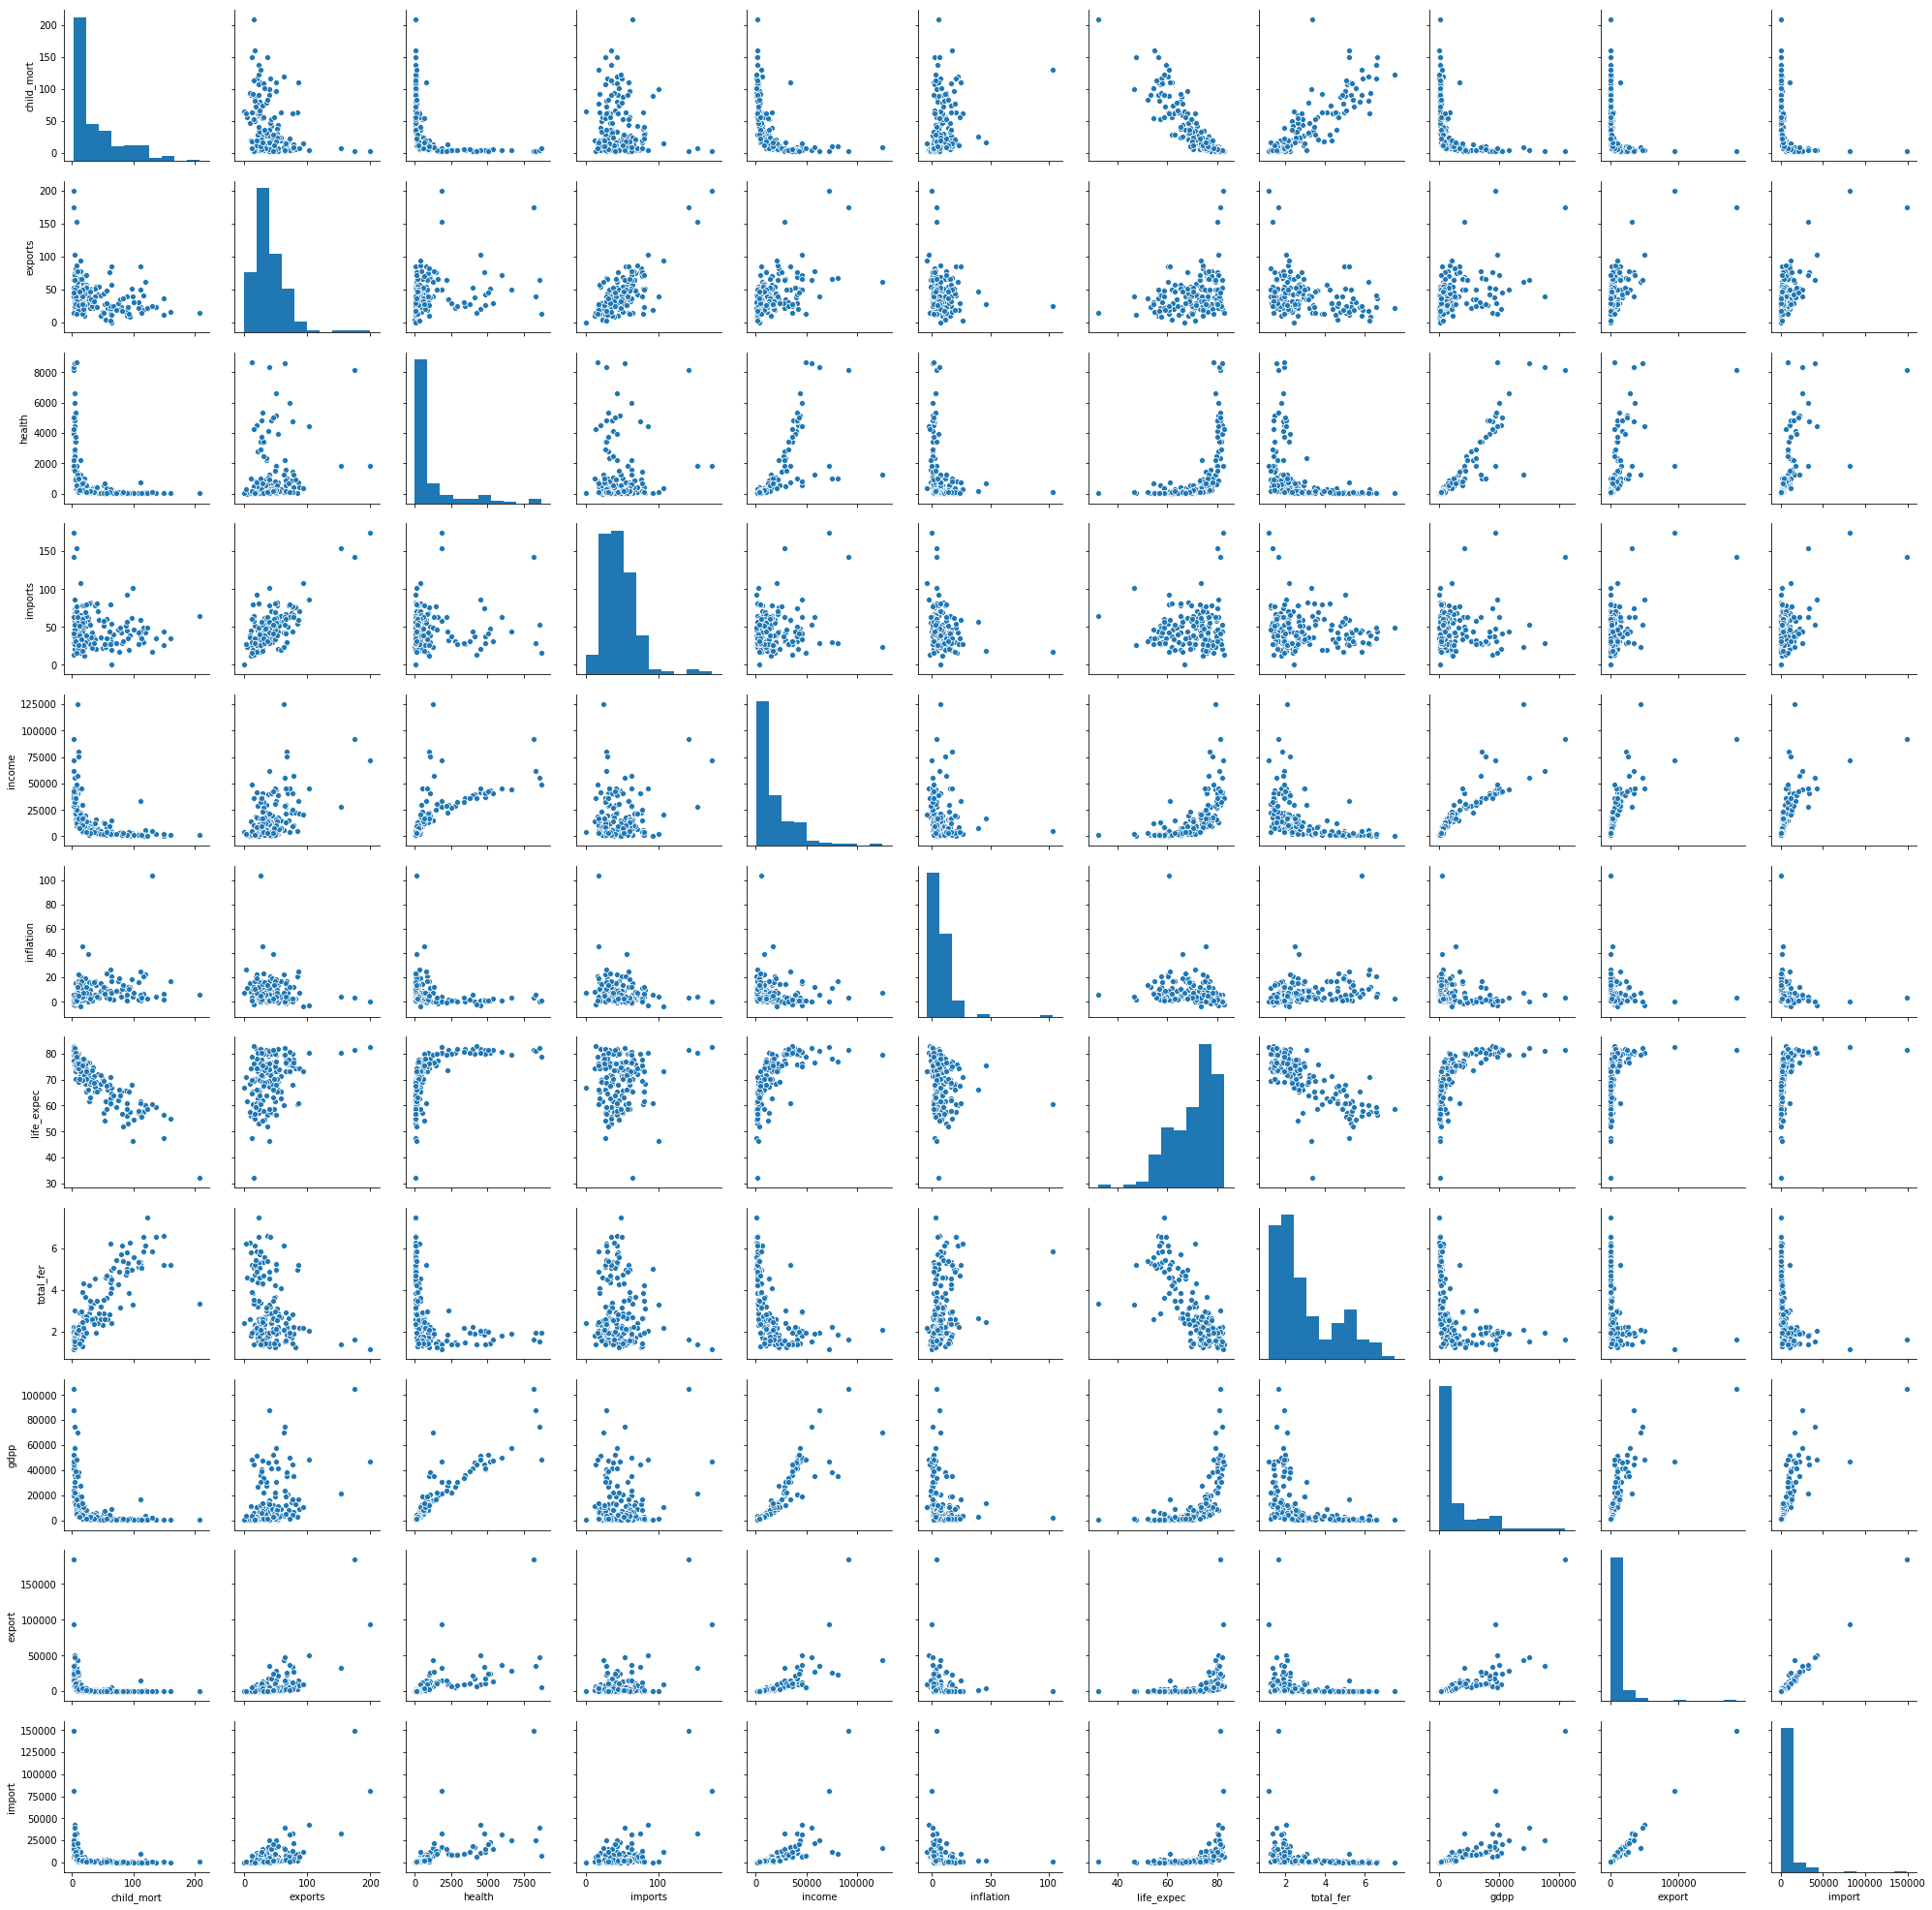

In [10]:
sns.pairplot(dat)

### As per above graphs there is no relation between any variables

In [11]:
dat.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,export,import
child_mort,1.000000,-0.318093,-0.430438,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032,-0.297230,-0.319138
exports,-0.318093,1.000000,0.252193,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725,0.699651,0.702031
health,-0.430438,0.252193,1.000000,0.048370,0.690857,-0.253956,0.545626,-0.407984,0.916593,0.612919,0.638581
imports,-0.127211,0.737381,0.048370,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498,0.472302,0.519732
income,-0.524315,0.516784,0.690857,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571,0.725351,0.672056
inflation,0.288276,-0.107294,-0.253956,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631,-0.141553,-0.179458
life_expec,-0.886676,0.316313,0.545626,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089,0.377694,0.397515
total_fer,0.848478,-0.320011,-0.407984,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910,-0.291096,-0.317061
gdpp,-0.483032,0.418725,0.916593,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000,0.768894,0.755114
export,-0.297230,0.699651,0.612919,0.472302,0.725351,-0.141553,0.377694,-0.291096,0.768894,1.000000,0.987686


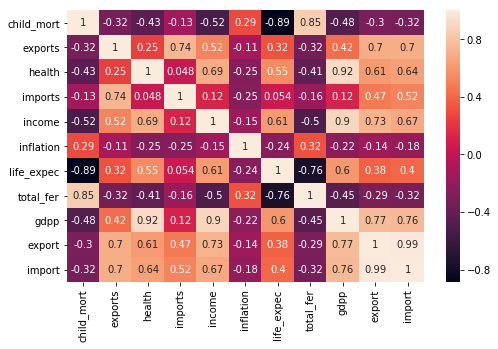

In [12]:
plt.figure(figsize=(8,5))
sns.heatmap(dat.corr(),annot = True)

### as per above heatmap there is good relaton between target valtable like gdpp,income and child_mort

### Checking Outliers before PCA

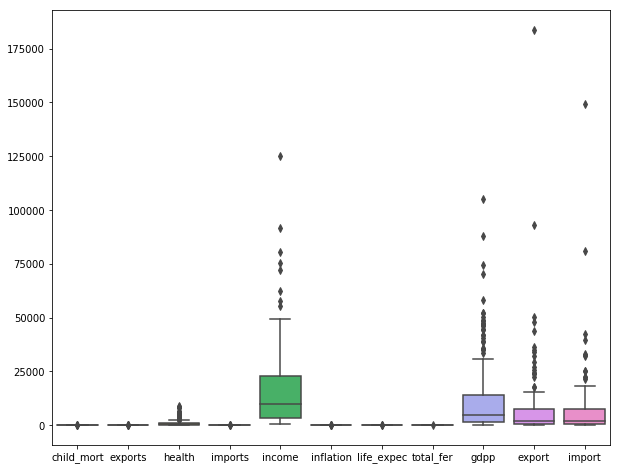

In [13]:
plt.figure(figsize = (10,8))
sns.boxplot(data = dat)
plt.show()

### As per above boxpot we do have some outliers espicially in gdpp. We can remove the outliers but in that way some of the data can be renoved which could be part of low income country

## Steps :
1. Read and visualized the data.
2. clean the data
3. prepare the data for modeling
4. Modeling
5. Final analysis with Kmeans and hierachical

## Start with Principal component analysis

In [14]:
# First lets check if we can explain the dataset using fewer variable
# We need to fit the after scaling.
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
dat2 = standard_scaler.fit_transform(dat)

In [15]:
dat2.shape

(167, 11)

In [16]:
dat2

array([[ 1.29153238, -1.13827979, -0.56503989, ..., -0.67917961,
        -0.4110113 , -0.4322755 ],
       [-0.5389489 , -0.47965843, -0.43921769, ..., -0.48562324,
        -0.35019096, -0.31367739],
       [-0.27283273, -0.09912164, -0.48482608, ..., -0.46537561,
        -0.31852577, -0.35372048],
       ...,
       [-0.37231541,  1.13030491, -0.53848844, ..., -0.63775406,
        -0.36146329, -0.37757179],
       [ 0.44841668, -0.40647827, -0.55059641, ..., -0.63775406,
        -0.39216643, -0.41847942],
       [ 1.11495062, -0.15034774, -0.54049845, ..., -0.62954556,
        -0.38395214, -0.41844533]])

In [17]:
#Importing the PCA module 
from sklearn.decomposition import PCA
pca = PCA(svd_solver = 'randomized', random_state = 42)

In [18]:
# Perfroming PCA
pca.fit(dat2)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [19]:
# List of PCA components
pca.components_

array([[-2.89914117e-01,  2.78454030e-01,  3.24068757e-01,
         1.64832897e-01,  3.58606502e-01, -1.35548097e-01,
         3.11862369e-01, -2.79568798e-01,  3.71015430e-01,
         3.49321954e-01,  3.52357316e-01],
       [ 3.96123348e-01,  3.74931327e-01, -9.38141295e-02,
         4.51950954e-01, -3.54572367e-02,  1.07353843e-01,
        -3.76148366e-01,  3.62308717e-01, -3.05101997e-02,
         3.20485856e-01,  3.16658678e-01],
       [ 2.88352961e-01, -2.89768324e-01,  3.67268168e-01,
        -5.04180498e-01,  2.43556665e-01,  3.40593171e-01,
        -1.24267967e-01,  3.17474978e-01,  3.48577131e-01,
         1.45021531e-01,  9.85357704e-02],
       [-1.93085371e-01,  2.47895396e-01, -2.54852345e-01,
        -2.40382262e-02,  8.64412869e-02,  8.71540822e-01,
         1.86801934e-01, -1.37697840e-01, -1.18901058e-01,
         1.21594418e-02, -2.32784369e-02],
       [ 9.93645509e-02,  3.17835023e-01, -4.94872283e-01,
        -3.16834655e-01,  6.49632839e-01, -2.58871896e-01,
  

In [20]:
# Let's check the variance ration
pca.explained_variance_ratio_

array([5.25317755e-01, 1.76400751e-01, 1.24119564e-01, 8.21491079e-02,
       2.83781883e-02, 2.29096036e-02, 2.02355877e-02, 1.14303754e-02,
       7.52792796e-03, 1.18387717e-03, 3.47261649e-04])

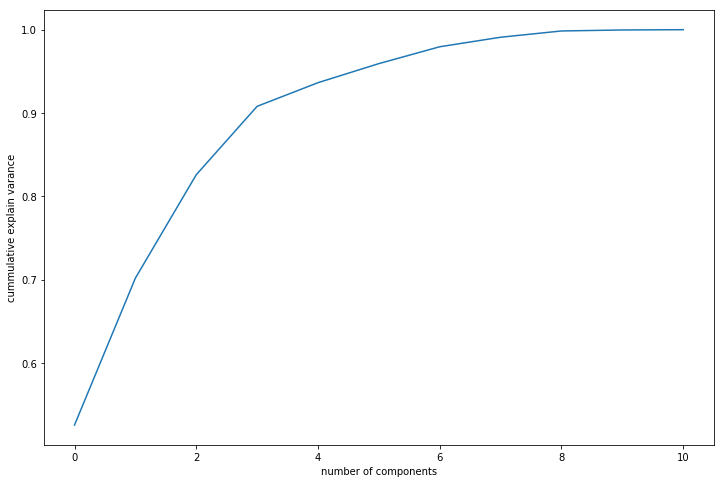

In [21]:
# Plotting the scree plot
#matplotlib inline
fig = plt.figure(figsize=(12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cummulative explain varance')
plt.show()


1. Around 96% of information is being explained by 5 components
2. We could choose at least 4 principal components. if 4 does not looks good we can choose 5 and then perform pca.
3. We could chosoe 6 also where varance could be around 99%
4. Lets start with 5 PCs

In [22]:
# lets see how 10 varibale loader into principal component.
# it cab be varified from below graph
colnames = list(dat.columns)
pcs_df = pd.DataFrame({'Country' : colnames, 'PC1' : pca.components_[0],'PC2' : pca.components_[1],'PC3' : pca.components_[2],'PC4' : pca.components_[3],'PC5' : pca.components_[4]})
pcs_df.shape


(11, 6)

In [23]:
pcs_df

,Country,PC1,PC2,PC3,PC4,PC5
0,child_mort,-0.289914,0.396123,0.288353,-0.193085,0.099365
1,exports,0.278454,0.374931,-0.289768,0.247895,0.317835
2,health,0.324069,-0.093814,0.367268,-0.254852,-0.494872
3,imports,0.164833,0.451951,-0.504180,-0.024038,-0.316835
4,income,0.358607,-0.035457,0.243557,0.086441,0.649633
5,inflation,-0.135548,0.107354,0.340593,0.871541,-0.258872
6,life_expec,0.311862,-0.376148,-0.124268,0.186802,-0.097906
7,total_fer,-0.279569,0.362309,0.317475,-0.137698,0.057527
8,gdpp,0.371015,-0.030510,0.348577,-0.118901,0.019069
9,export,0.349322,0.320486,0.145022,0.012159,-0.011198


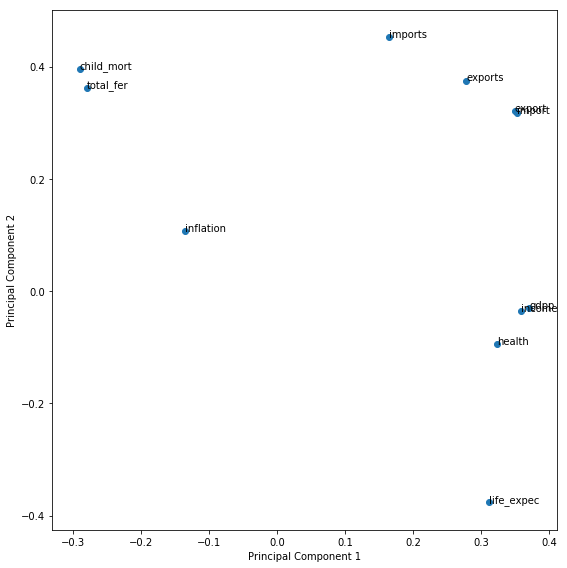

In [24]:
# Let's plot them to visualise how these features are loaded
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Country):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

1. As per above plot we could have at least 3 clustet.
2. These cluster depends upon how data variance 
3. Lets start with 4 principal components

In [25]:
# Lets start with dimenstaionality reduction using 5 principal component
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

In [26]:
df_pca = pca_final.fit_transform(dat2)

In [27]:
df_pca

array([[-2.78404276e+00,  1.19561820e+00, -8.66186821e-01,
        -7.91375431e-01, -1.17805922e-01],
       [-1.70848690e-01, -1.09345242e+00,  1.01961517e+00,
         6.99324183e-02, -4.20375403e-01],
       [-5.86192314e-01, -7.64124930e-01,  3.55090212e-02,
         1.03896538e+00, -1.62517913e-01],
       [-2.34166839e+00,  2.25956884e+00, -1.13843319e+00,
         6.91711857e-01,  6.90732945e-01],
       [ 7.22026689e-01, -5.22799819e-01,  1.02682264e+00,
        -1.08849880e-01,  2.79191256e-02],
       [-4.33297847e-01, -1.53733161e+00, -7.69116068e-01,
         1.25934503e+00, -4.31105458e-01],
       [-5.55281016e-01, -1.07502236e+00,  8.03291527e-01,
         2.08438298e-01, -6.18259078e-01],
       [ 2.55164408e+00, -2.05293685e+00, -1.75828701e+00,
        -8.51388688e-01,  2.77393101e-01],
       [ 3.69352473e+00, -7.09880008e-01, -1.00603771e+00,
        -6.77433721e-01,  1.01070865e-01],
       [-4.96578144e-01, -5.64081777e-01, -4.53404643e-02,
         8.71520169e-01

In [28]:
df_pca.shape

(167, 5)

In [29]:
#Transpose to the original dataframe
pc = np.transpose(df_pca)

In [30]:
pc1  = np.corrcoef(df_pca.transpose())

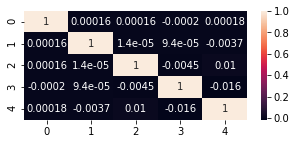

In [31]:
# Plotting the correlation matrix
plt.figure(figsize=(5,2))
sns.heatmap(pc1,annot = True)

In [32]:
#1s and 0s in dialogue
corr_mat= pc1 - np.diagflat(pc1.diagonal())
print ("max_corr:",corr_mat.max(),", min corr: " , corr_mat.min(),)

max_corr: 0.010083464263612322 , min corr:  -0.015692820171740906


### There is no correlation between any of the components

In [33]:
pcs_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1]})

In [34]:
pcs_df2.head()

,PC1,PC2
0,-2.784043,1.195618
1,-0.170849,-1.093452
2,-0.586192,-0.764125
3,-2.341668,2.259569
4,0.722027,-0.522800


### removing data
1. We are not going to remove any country based on outliers analysis
2. When we did oerform the outlier analysis it seems some of the country who has less chirld mort are deleted.
3. it is not good iead to remove the data as we could loose information.

In [35]:
# Performing outlier analysi
# we're doing outlier analyis pefore performing cluster
# We might reassign the outliers to the cluster
#plt.boxplot(pcs_df2.PC1)
#Q1 = pcs_df2.PC1.quantile(0.05)
#Q3 = pcs_df2.PC1.quantile(0.95)
#IQR = Q3 - Q1

#pcs_df2 = pcs_df2[(pcs_df2.PC1 >= Q1) & (pcs_df2.PC1 <= Q3)]
#pcs_df2 = pcs_df2[(pcs_df2.PC1 >= Q1 - 1.5*IQR) & (pcs_df2.PC1 <= Q3+ 1.5*IQR)]

In [36]:
# Performing outlier analysi
# we're doing outlier analyis pefore performing cluster
# We might reassign the outliers to the cluster
#plt.boxplot(pcs_df2.PC2)
#Q1 = pcs_df2.PC2.quantile(0.05)
#Q3 = pcs_df2.PC2.quantile(0.95)
#IQR = Q3 - Q1

#pcs_df2 = pcs_df2[(pcs_df2.PC2 >= Q1) & (pcs_df2.PC2 <= Q3)]
#pcs_df2 = pcs_df2[(pcs_df2.PC1 >= Q1 - 1.5*IQR) & (pcs_df2.PC1 <= Q3+ 1.5*IQR)]

In [37]:
pcs_df2.shape

(167, 2)

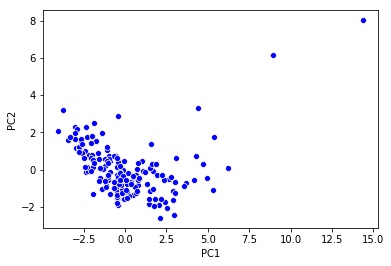

In [38]:
# lets see how it looks like in visualization on each PCs
#Advantage of PCs is we can visualize high dimensional data
sns.scatterplot(x = 'PC1',y = 'PC2',data = pcs_df2,color = 'b')

In [39]:
# from above diagram we can see some cluster but its not visable properly
# Hence we can confirm from clusering 

### Clustring process

In [40]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H
    
    

In [41]:
#Let's check the Hopkins measure and it should be greater than 0.5
hopkins(pcs_df2)

0.905449623200006

### Hopkins measure is more than 90% so it good sign of bonding of clustring

In [42]:
dat3_1 = pcs_df2

In [43]:
dat3_1.head()

,PC1,PC2
0,-2.784043,1.195618
1,-0.170849,-1.093452
2,-0.586192,-0.764125
3,-2.341668,2.259569
4,0.722027,-0.522800


### K- means Clustering

In [44]:
# Begin with K-Means clustring
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(dat3_1)
    sse_.append([k, silhouette_score(dat3_1, kmeans.labels_)])

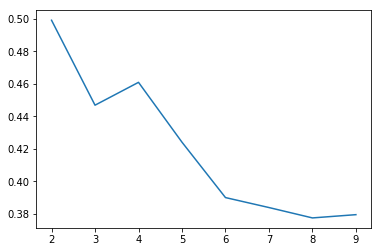

In [45]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

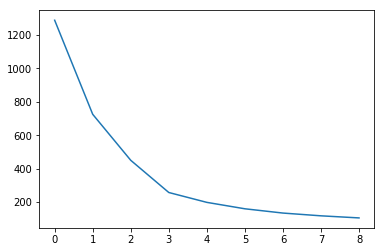

In [46]:
## From the above analysis we find that 4 seems to be a good number of clusters for K means algorithm
#Now let's proceed to the elbow curve method
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(dat3_1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [47]:
#### Here also we're seeing a distinct bend at around 2 clusters. Hence it seems a good K to choose.
#Let's perform K means using K=2
model_clus2 = KMeans(n_clusters = 5, max_iter=50,random_state = 50)
model_clus2.fit(dat3_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [48]:
dat4=pcs_df2
dat4.index = pd.RangeIndex(len(dat4.index))
dat_km = pd.concat([dat4, pd.Series(model_clus2.labels_)], axis=1)
dat_km.columns = ['PC1', 'PC2','ClusterID']
dat_km.head()

,PC1,PC2,ClusterID
0,-2.784043,1.195618,1
1,-0.170849,-1.093452,2
2,-0.586192,-0.764125,2
3,-2.341668,2.259569,1
4,0.722027,-0.522800,2


In [49]:
dat_km['ClusterID'].value_counts()

2    74
1    45
0    35
4    11
3     2
Name: ClusterID, dtype: int64

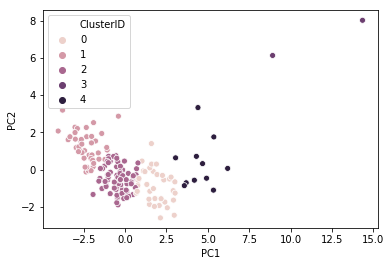

In [50]:
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=dat_km)

In [51]:
df5=pd.merge(dat1,dat_km, left_index=True,right_index=True)
df5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-2.784043,1.195618,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,-0.170849,-1.093452,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.586192,-0.764125,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-2.341668,2.259569,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0.722027,-0.522800,2


In [52]:
df6=df5.drop(['PC1','PC2'],axis=1)
df6.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


#So we have performed the clustering using the PCs and have now allocated the clusterIDs back to each of the datapoints

In [53]:
df6.rename(columns = {'import':'import_cnt'},inplace = True)

In [54]:
df6.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


### Analysis of the clusters

In [55]:
child_mort = pd.DataFrame(df6.groupby(["ClusterID"]).child_mort.mean())
income = pd.DataFrame(df6.groupby(["ClusterID"]).income.mean())
gdpp = pd.DataFrame(df6.groupby(["ClusterID"]).gdpp.mean())

In [56]:
df_ori = pd.concat([pd.Series([0,1,2,3,4]),child_mort,income,gdpp], axis=1)

In [57]:
df_ori

,0,child_mort,income,gdpp
0,0,6.608571,33885.714286,27673.428571
1,1,94.537778,3312.733333,1633.600000
2,2,24.909459,10448.513514,5163.945946
3,3,2.800000,81900.000000,75800.000000
4,4,5.154545,53736.363636,53563.636364


In [58]:
df_ori.columns = ["ClusterID","child_mort","income","gdpp"]
df_ori

,ClusterID,child_mort,income,gdpp
0,0,6.608571,33885.714286,27673.428571
1,1,94.537778,3312.733333,1633.600000
2,2,24.909459,10448.513514,5163.945946
3,3,2.800000,81900.000000,75800.000000
4,4,5.154545,53736.363636,53563.636364


In [59]:
df_ori.rename(columns = {'import_cnt':'import'},inplace = True)

In [60]:
df_ori.head()

,ClusterID,child_mort,income,gdpp
0,0,6.608571,33885.714286,27673.428571
1,1,94.537778,3312.733333,1633.600000
2,2,24.909459,10448.513514,5163.945946
3,3,2.800000,81900.000000,75800.000000
4,4,5.154545,53736.363636,53563.636364


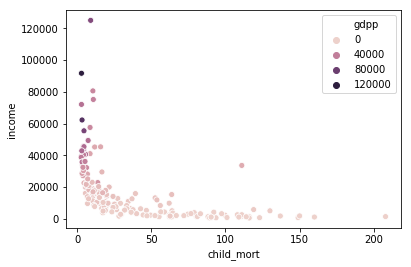

In [61]:
sns.scatterplot(x='child_mort',y='income',hue = 'gdpp',data=df6)

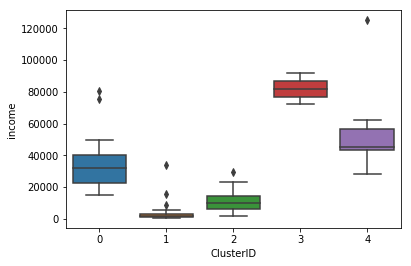

In [62]:
sns.boxplot(x='ClusterID',y='income',data=df6)

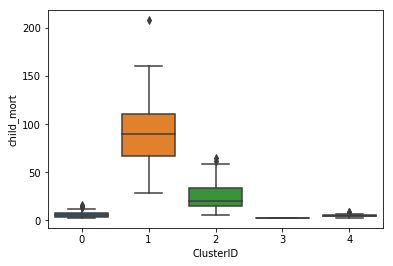

In [63]:
sns.boxplot(x='ClusterID',y='child_mort',data=df6)

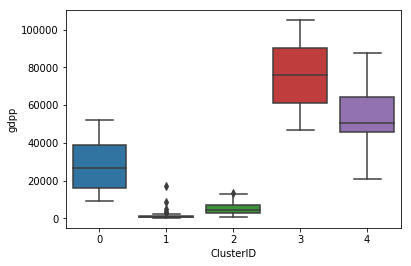

In [64]:
sns.boxplot(x='ClusterID',y='gdpp',data=df6)

In [65]:
#Let's use the concept of binning
fin=dat1[dat1['child_mort']>=56.070755]
fin=fin[fin['income']<= 6730.594340]
fin=fin[fin['gdpp']<= 3236.735849]

In [66]:
fin.shape

(40, 10)

In [67]:
fin[['country','child_mort','income','gdpp']].head()

,country,child_mort,income,gdpp
0,Afghanistan,90.2,1610,553
17,Benin,111.0,1820,758
25,Burkina Faso,116.0,1430,575
26,Burundi,93.6,764,231
28,Cameroon,108.0,2660,1310


In [68]:
fin[['country','child_mort','income','gdpp']].sort_values(['child_mort','income','gdpp'],axis = 0,ascending=False).head(10)

,country,child_mort,income,gdpp
66,Haiti,208.0,1500,662
132,Sierra Leone,160.0,1220,399
32,Chad,150.0,1930,897
31,Central African Republic,149.0,888,446
97,Mali,137.0,1870,708
113,Nigeria,130.0,5150,2330
112,Niger,123.0,814,348
25,Burkina Faso,116.0,1430,575
37,"Congo, Dem. Rep.",116.0,609,334
64,Guinea-Bissau,114.0,1390,547


## Top 10 countries.
1. Above are the top 10 countries which meet our business criteria.
2. from above it seems they fall in cluster number 1.
3. All having high child_mort and low income and gdpp.
4. above list is sort by values for all three components.
5. above counter fall in cluster number 2  and identify the ones which are in dire need of aid
6. Above countries  vary for each cluster of countries to recognise and differentiate the clusters of developed countries from the clusters of under-developed countries


## Hierarchical clustering with linkage

### Single linkage and dendrogram

In [69]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [70]:
dat2 = pd.DataFrame(df6)
dat2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


In [71]:
df_h = dat2.drop('country',axis = 1)

In [72]:
df_h.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


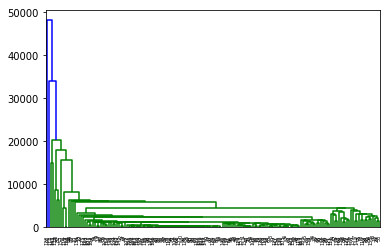

In [73]:
#Single linkage
merging = linkage(df_h,method ="single",metric = "euclidean")
dendrogram(merging)
plt.show()

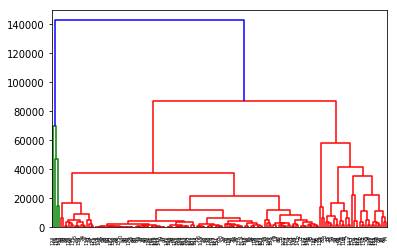

In [74]:
#Complete linkage
merging = linkage(df_h,method ="complete",metric = "euclidean")
dendrogram(merging)
plt.show()

In [75]:
# 5 cluster
cluster_labels = cut_tree(merging,n_clusters=5).reshape(-1,)

In [76]:
dat2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


In [77]:
df_h['cluster_labels'] = cluster_labels
df_h.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,cluster_labels
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,0
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,0


In [78]:
# Lets assign cluster from kmean 
df_h['ClusterID'] = kmeans.labels_
df_h.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,cluster_labels
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,5,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,5,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,0
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,0


In [79]:
df_h['Country'] = dat1.country
df_h.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,cluster_labels,Country
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0,Afghanistan
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,5,0,Albania
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,5,0,Algeria
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,0,Angola
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,0,Antigua and Barbuda


In [80]:
#lets find the final list of country
cl0 = df_h.loc[(df_h['cluster_labels'] == 0)]
cl1 = df_h.loc[(df_h['cluster_labels'] == 1)]
cl2 = df_h.loc[(df_h['cluster_labels'] == 2)]
cl3 = df_h.loc[(df_h['cluster_labels'] == 3)]
cl4 = df_h.loc[(df_h['cluster_labels'] == 4)]

In [81]:
#Lets see how country looks like:
print(cl0['Country'].count())

129


In [82]:
#Lets see how country looks like:
print(cl1['Country'].count())

31


In [83]:
#Lets see how country looks like:
print(cl2['Country'].count())

3


In [84]:
#Lets see how country looks like:
print(cl3['Country'].count())

3


In [85]:
#Lets see how country looks like:
print(cl4['Country'].count())

1


In [86]:
# Lets see if we have any ouliers for any 
my_df = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']

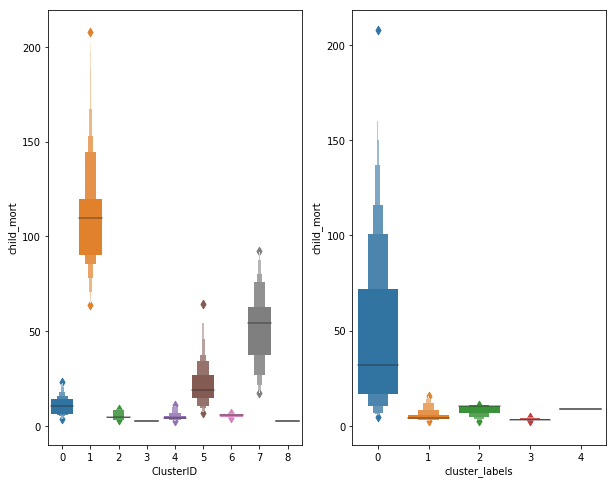

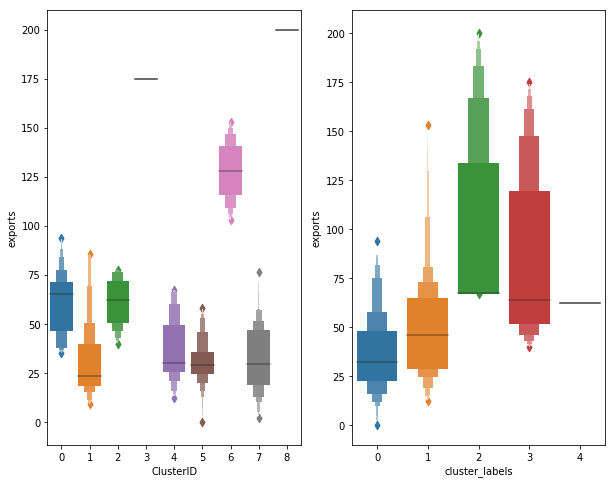

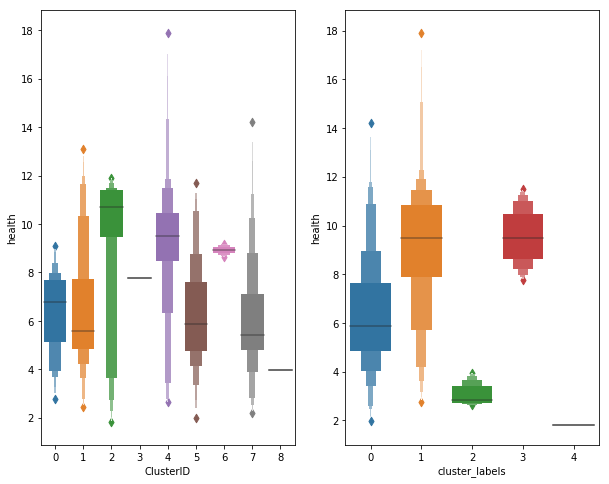

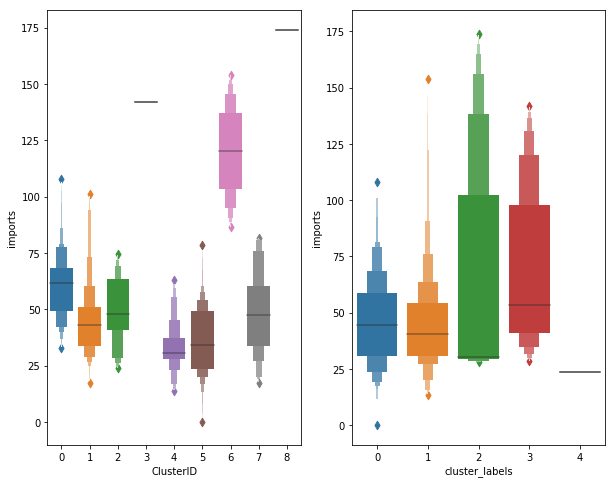

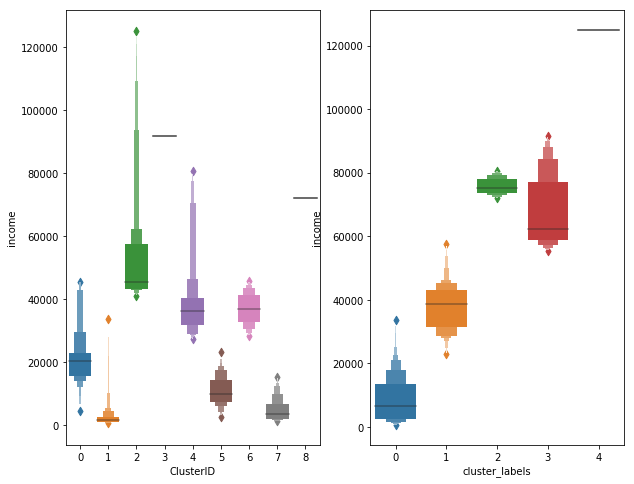

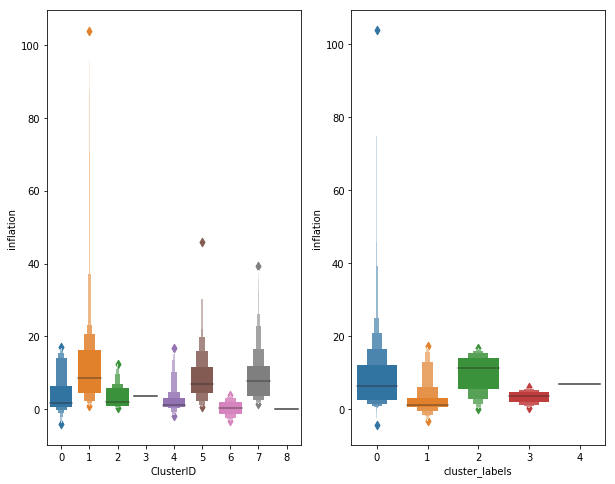

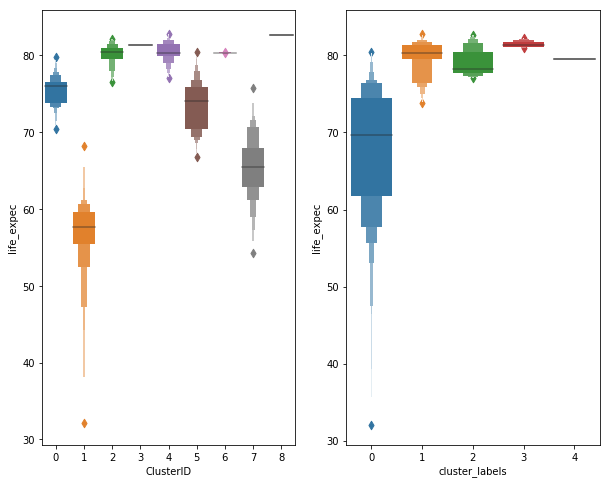

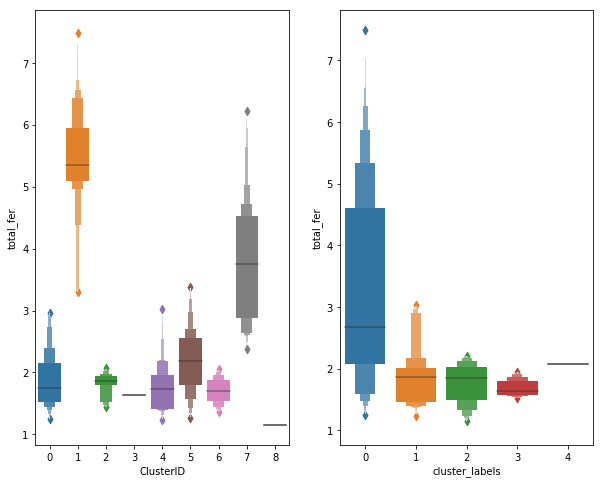

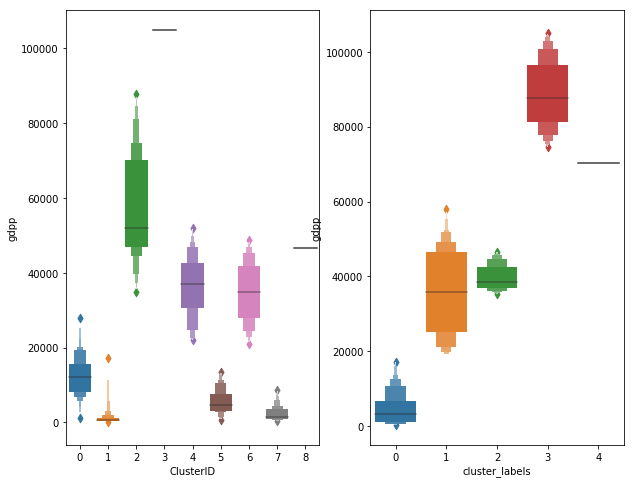

In [87]:
for i in my_df:
    plt.figure(figsize=(10,8))
    plt.subplot(1,2,1)
    sns.boxenplot(x = 'ClusterID' , y=i, data= df_h)
    plt.subplot(1,2,2)
    sns.boxenplot(x = 'cluster_labels' , y=i, data= df_h)
    plt.show()

In [88]:
df_h.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,cluster_labels,Country
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0,Afghanistan
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,5,0,Albania
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,5,0,Algeria
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,0,Angola
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,0,Antigua and Barbuda


In [89]:
colnames = list(dat.columns)
pcs1_df = pd.DataFrame({'Country' : colnames, 'PC1' : pca.components_[0],'PC2' : pca.components_[1],'PC3' : pca.components_[2],'PC4' : pca.components_[3],'PC5' : pca.components_[4]})
pcs1_df.shape

(11, 6)

In [90]:
pcs1_df.head()

,Country,PC1,PC2,PC3,PC4,PC5
0,child_mort,-0.289914,0.396123,0.288353,-0.193085,0.099365
1,exports,0.278454,0.374931,-0.289768,0.247895,0.317835
2,health,0.324069,-0.093814,0.367268,-0.254852,-0.494872
3,imports,0.164833,0.451951,-0.504180,-0.024038,-0.316835
4,income,0.358607,-0.035457,0.243557,0.086441,0.649633


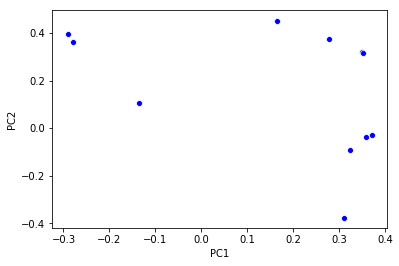

In [91]:
# lets see how it looks like in visualization on each PCs
#Advantage of PCs is we can visualize high dimensional data
sns.scatterplot(x = 'PC1',y = 'PC2',data = pcs1_df,color = 'b')

In [92]:
pcs1_df = pd.DataFrame({'PC1':pc[0],'PC2':pc[1]})

In [93]:
dat40=pcs1_df
dat40.index = pd.RangeIndex(len(dat40.index))
dat1_km = pd.concat([dat40, pd.Series(model_clus2.labels_)], axis=1)
dat1_km.columns = ['PC1', 'PC2','cluster_labels']
dat1_km.head()

,PC1,PC2,cluster_labels
0,-2.784043,1.195618,1
1,-0.170849,-1.093452,2
2,-0.586192,-0.764125,2
3,-2.341668,2.259569,1
4,0.722027,-0.522800,2


In [94]:
dat1_km['cluster_labels'].value_counts()

2    74
1    45
0    35
4    11
3     2
Name: cluster_labels, dtype: int64

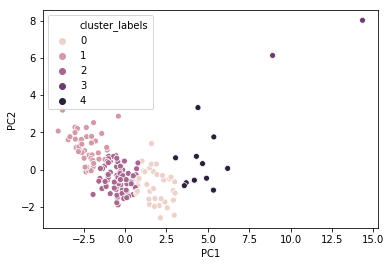

In [95]:
sns.scatterplot(x='PC1',y='PC2',hue='cluster_labels',legend='full',data=dat1_km)

## Hierachcal clustring
1. from above couple of above it seems cluster does not good in hiechirical clustring.
2. we choose principal component 5 for both clustring and we tool 5 cluster but in hiechirical clustering cluster 4 and 5 just have 2 country
3. from the dendogram it seems we could choose 5 cluster but as per scatter plot clustring is not good.
4. From KMean clustring it clearly seeme which country need aid
5. so in between hierachical and KMeans clusring we should choose KMeans clustring snce it is good.

## Conclusion..

#### Top 10 countries.
1. Above are the top 10 countries which meet our business criteria.
2. from above it seems they fall in cluster number 1.
3. All having high child_mort and low income and gdpp.
4. above list is sort by values for all three components.
5. above counter fall in cluster number 2  and identify the ones which are in dire need of aid
6. Above countries  vary for each cluster of countries to recognise and differentiate the clusters of developed countries from the clusters of under-developed countries
7. frierachical and KMeans clustring we should choose KMeans.
8. In KMeans it is clearly visiable which country need immideately aid.

### Below is the top 10 country which need immideately help.
1)Haiti
2)Sierra Leone
3)Chad
4)Central African Republic
5)Mali
6)Nigeria
7)Niger
8)Burkina Faso
9)Congo, Dem. Rep.
10)Guinea-Bissau